In [29]:
# rdkit
from rdkit import RDLogger, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors, Lipinski
from rdkit.Chem.Draw import IPythonConsole
RDLogger.DisableLog('rdApp.*')

# data
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#keras
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
def smiles2mols(smiles_list):

    mols_list = []
    
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol != None:
            mols_list.append(mol)
    
    invalid = len(smiles_list) - len(mols_list)
    
    print('Number of Invalid: ', invalid)
    
    return mols_list

In [3]:
def gen_descriptors(smiles_list):
    
    descriptors_list = []
    num_smiles = len(smiles_list)
    num_descriptors = 21
    
    for smiles in smiles_list:
        row = [Descriptors.MolWt(smiles), 
               Descriptors.MolLogP(smiles), 
               Descriptors.NumHDonors(smiles), 
               Descriptors.NumHAcceptors(smiles), 
               Descriptors.TPSA(smiles), 
               Descriptors.NumRotatableBonds(smiles),
               
               Lipinski.FractionCSP3(smiles), 
               Lipinski.HeavyAtomCount(smiles), 
               Lipinski.NHOHCount(smiles), 
               Lipinski.NOCount(smiles),
               Lipinski.NumAliphaticCarbocycles(smiles),
               Lipinski.NumAliphaticHeterocycles(smiles),
               Lipinski.NumAliphaticRings(smiles),
               Lipinski.NumAromaticCarbocycles(smiles),
               Lipinski.NumAromaticHeterocycles(smiles),
               Lipinski.NumAromaticRings(smiles),
               Lipinski.NumHeteroatoms(smiles),
               Lipinski.NumSaturatedCarbocycles(smiles),
               Lipinski.NumSaturatedHeterocycles(smiles),
               Lipinski.NumSaturatedRings(smiles),
               Lipinski.RingCount(smiles)]
        
        descriptors_list = np.concatenate((descriptors_list, row), axis=0)
        
    descriptors_list = descriptors_list.reshape(num_smiles, num_descriptors)
    
    headers = ['MolWt', 
               'MolLogP', 
               'NumHDonors', 
               'NumHAcceptors', 
               'TPSA', 
               'NumRotatableBonds', 
               'FractionCSP3', 
               'HeavyAtomCount', 
               'NHOHCount', 
               'NOCount', 
               'NumAliphaticCarbocycles', 
               'NumAliphaticHeterocycles', 
               'NumAliphaticRings', 
               'NumAromaticCarbocycles', 
               'NumAromaticHeterocycles', 
               'NumAromaticRings', 
               'NumHeteroatoms', 
               'NumSaturatedCarbocycles', 
               'NumSaturatedHeterocycles', 
               'NumSaturatedRings', 
               'RingCount']
    
    print('Number of headers: ' + str(len(headers)))

    df = pd.DataFrame(descriptors_list, columns = headers) 
    
    return df

In [4]:
df = pd.read_csv(r'/Users/alee224/Desktop/BME CuRES Cancer/Research/qnar_supp_data.csv')
df.head()

,Unnamed: 0,Unnamed: 1,PaCa2 cellular
0,1,FC(F)(F)C(=O)OC(=O)C(F)(F)F,4.17
1,2,FC(F)(Cl)C(=O)OC(=O)C(F)(F)Cl,3.95
2,3,FC(F)(F)C(F)(F)C(=O)OC(=O)C(F)(F)C(F)(F)F,4.08
3,4,CC1(C)CC(=O)OC1=O,4.11
4,5,O=C1OC(=O)C=C1,3.98


In [5]:
df_clean = df[['Unnamed: 1', 'PaCa2 cellular']]
df_clean

,Unnamed: 1,PaCa2 cellular
0,FC(F)(F)C(=O)OC(=O)C(F)(F)F,4.17
1,FC(F)(Cl)C(=O)OC(=O)C(F)(F)Cl,3.95
2,FC(F)(F)C(F)(F)C(=O)OC(=O)C(F)(F)C(F)(F)F,4.08
3,CC1(C)CC(=O)OC1=O,4.11
4,O=C1OC(=O)C=C1,3.98
...,...,...
104,O=C1COCC(=O)O1,3.99
105,O=C1OC(=O)c2ccccc12,3.90
106,OC(=O)CC1CC(=O)OC1=O,4.03
107,Fc1ccc(F)c2C(=O)OC(=O)c12,3.91


In [6]:
df_clean.shape

(109, 2)

In [7]:
df_clean.columns = ['smiles','PaCa2 cellular']

In [8]:
mols = smiles2mols(df_clean['smiles'])

Number of Invalid:  0


In [19]:
X = gen_descriptors(mols)
y = df['PaCa2 cellular']

Number of headers: 21


## Beginning Test-Train Split

In [24]:
X = gen_descriptors(mols)
y = df['PaCa2 cellular']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

Number of headers: 21


In [21]:
combined = X.assign(target = y)

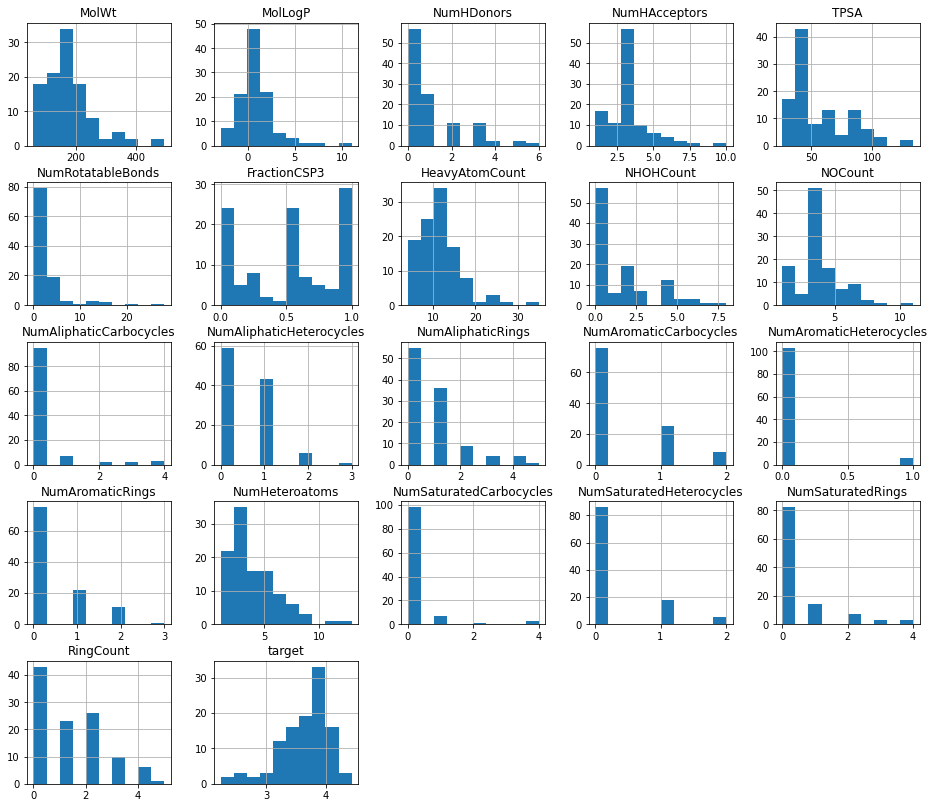

These are the histograms of all of the represented features


In [13]:
combined.hist(figsize = (16,14))
plt.show()
print('These are the histograms of all of the represented features')

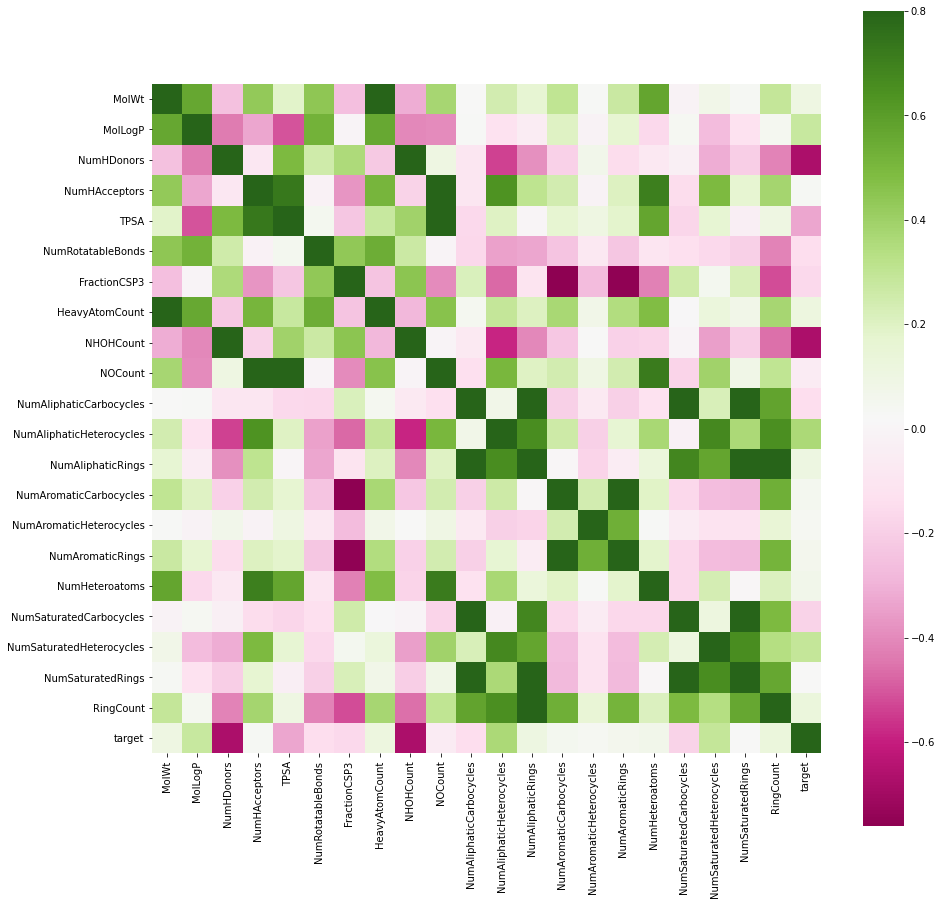

In [14]:
C_mat = combined.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True, cmap="PiYG")
plt.show()

In [32]:
X = gen_descriptors(mols)
y = df['PaCa2 cellular']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

Number of headers: 21


In [33]:
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [34]:
# Normalize the data

y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)
scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)
scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

In [87]:
NN_model = Sequential()

# Input Layer :
NN_model.add(Dense(22, input_dim=21, kernel_initializer='normal', activation='relu'))
# Hidden Layer:
NN_model.add(Dense(4, activation='relu'))
# Output Layer:
NN_model.add(Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

NN_model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
history = NN_model.fit(xtrain_scale, ytrain_scale, epochs=200, batch_size=64, verbose=1, validation_split=0.2)
predictions = NN_model.predict(xval_scale)

NN_model.summary()

Epoch 1/200
2/2 [==============================] - 0s 115ms/step - loss: 0.4332 - mse: 0.4332 - mae: 0.6292 - val_loss: 0.5480 - val_mse: 0.5480 - val_mae: 0.7216
Epoch 2/200
2/2 [==============================] - 0s 17ms/step - loss: 0.4179 - mse: 0.4179 - mae: 0.6165 - val_loss: 0.5385 - val_mse: 0.5385 - val_mae: 0.7148
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 0.4089 - mse: 0.4089 - mae: 0.6083 - val_loss: 0.5311 - val_mse: 0.5311 - val_mae: 0.7093
Epoch 4/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4025 - mse: 0.4025 - mae: 0.6023 - val_loss: 0.5237 - val_mse: 0.5237 - val_mae: 0.7041
Epoch 5/200
2/2 [==============================] - 0s 20ms/step - loss: 0.3962 - mse: 0.3962 - mae: 0.5968 - val_loss: 0.5161 - val_mse: 0.5161 - val_mae: 0.6988
Epoch 6/200
2/2 [==============================] - 0s 21ms/step - loss: 0.3902 - mse: 0.3902 - mae: 0.5915 - val_loss: 0.5084 - val_mse: 0.5084 - val_mae: 0.6933
Epoch 7/200
2/2 [==========

2/2 [==============================] - 0s 20ms/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1746 - val_loss: 0.0384 - val_mse: 0.0384 - val_mae: 0.1722
Epoch 102/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0444 - mse: 0.0444 - mae: 0.1737 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1714
Epoch 103/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0440 - mse: 0.0440 - mae: 0.1730 - val_loss: 0.0379 - val_mse: 0.0379 - val_mae: 0.1710
Epoch 104/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0437 - mse: 0.0437 - mae: 0.1724 - val_loss: 0.0377 - val_mse: 0.0377 - val_mae: 0.1705
Epoch 105/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0434 - mse: 0.0434 - mae: 0.1718 - val_loss: 0.0375 - val_mse: 0.0375 - val_mae: 0.1698
Epoch 106/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0430 - mse: 0.0430 - mae: 0.1710 - val_loss: 0.0371 - val_mse: 0.0371 - val_mae: 0.1688
Epoch 107/200
2/2 [===========

2/2 [==============================] - 0s 20ms/step - loss: 0.0280 - mse: 0.0280 - mae: 0.1336 - val_loss: 0.0224 - val_mse: 0.0224 - val_mae: 0.1286
Epoch 152/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0277 - mse: 0.0277 - mae: 0.1326 - val_loss: 0.0222 - val_mse: 0.0222 - val_mae: 0.1278
Epoch 153/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0274 - mse: 0.0274 - mae: 0.1316 - val_loss: 0.0220 - val_mse: 0.0220 - val_mae: 0.1269
Epoch 154/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0271 - mse: 0.0271 - mae: 0.1306 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.1263
Epoch 155/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0268 - mse: 0.0268 - mae: 0.1300 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.1259
Epoch 156/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.1296 - val_loss: 0.0216 - val_mse: 0.0216 - val_mae: 0.1253
Epoch 157/200
2/2 [===========

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


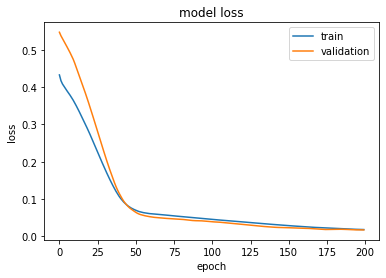

In [88]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [89]:
predictions = scaler_y.inverse_transform(predictions)
predictions.shape

(22, 1)

In [90]:
mean_absolute_error(y_val, predictions)

0.2602712479504673

In [91]:
mean_squared_error(y_val, predictions)
math.sqrt(mean_squared_error(y_val, predictions))

0.3138094109156074

In [92]:
np.mean(y_val)

3.670454545454545

In [93]:
np.mean(predictions)

3.827482

types of regression models <br>
NN properties - layer count, learning rate, number of neurons <br>
chemical descriptors <br> 
look for databases - incorporate more data